In [4]:
import os
import socket
import subprocess
import pandas as pd
import io
from contextlib import redirect_stdout
import itertools
import warnings
from datetime import datetime
import time
import timeout_decorator
import numpy as np
import matplotlib.pyplot as plt


In [5]:
def islocal(): return socket.gethostname()=="rc-idsia-macBook.local"
def isserver(): return socket.gethostname()=="ec6120930b2d"
def strdate(): return datetime.today().strftime('%Y-%m-%d-%H-%M-%S')


if islocal():
    prj_path = "/Users/rcabanas/GoogleDrive/IDSIA/causality/dev/crema/CreMA"
    os.environ['JAVA_HOME'] = "/Library/Java/JavaVirtualMachines/openjdk-12.0.1.jdk/Contents/Home"
elif isserver():
    prj_path="/home/rcabanas/work_java_crema/crema/CreMA"
else:
    warnings.warn("Unknown server, set prj_path variable manually.")
os.chdir(prj_path)
!pwd

/Users/rcabanas/GoogleDrive/IDSIA/causality/dev/crema/CreMA


In [6]:
exp_folder = f"{prj_path}/papers/pgm20/experiments/"
log_folder = f"{exp_folder}/logs/"
res_folder = f"{exp_folder}/results/"

In [10]:
!ls {res_folder}

2020-04-17-11-31-23_run_chain_markovian.csv
2020-04-17-13-15-45_chain_markovian.csv
2020-04-17-13-17-11_chain_markovian.csv
2020-04-17-15-09-47_chain_markovian.csv
2020-04-17-15-10-02_chain_nonmarkovian.csv
2020-04-17-15-10-56_chain_nonmarkovian.csv
2020-04-17-15-14-01_chain_nonmarkovian.csv
2020-04-17-15-15-27_chain_nonmarkovian.csv
2020-04-17-15-17-55_chain_nonmarkovian.csv
2020-04-20-12-33-27_chain_markovian.csv
2020-04-20-12-33-32_chain_nonmarkovian.csv
2020-04-20-13-27-11_chain_markovian.csv
2020-04-20-13-28-03_chain_nonmarkovian.csv
2020-04-20-13-28-57_chain_nonmarkovian.csv
2020-04-20-13-30-07_chain_markovian.csv
2020-04-20-13-42-30_chain_markovian.csv
2020-04-20-13-47-01_chain_markovian.csv
2020-04-20-13-47-44_chain_nonmarkovian.csv
2020-04-20-14-13-26_chain_markovian.csv
2020-04-20-14-26-56_chain_nonmarkovian.csv
2020-04-20-14-55-32_chain_markovian.csv
2020-04-20-14-56-25_chain_markovian.csv
2020-04-20-14-57-07_chain_nonmarkovian.csv
2020-04-20-15-26-14_chain_markovian.csv
202

In [16]:
methods = np.unique(results1["method"].to_numpy())
methods

array(['CCALP', 'CCALPeps', 'CCVE', 'CVE'], dtype=object)

In [31]:
def plot_time(results, title):
    fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')

    N = np.unique(results["N"].to_numpy())
    methods = np.unique(results["method"].to_numpy())


    for m in methods:
        #if m not in ["CCVE"]:
            data = results.query(f"method=='{m}'").filter(items=["time"]).to_numpy()
            plt.plot(N, data, marker='o', label=m)
            plt.legend()

    plt.ylabel("time (ms)")
    plt.xlabel("Number of endogenous variables")

    plt.title(title)

    plt.show()


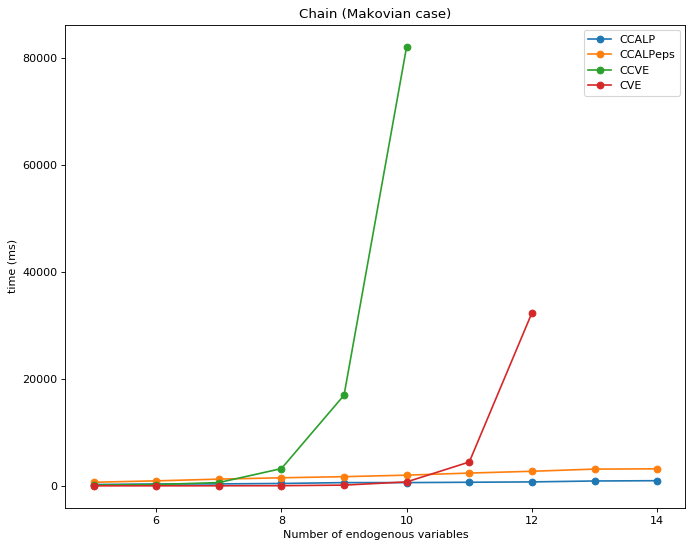

In [32]:
results1 = pd.read_csv(f"{res_folder}/2020-04-22-10-53-14_chain_markovian.csv")
plot_time(results1, "Chain (Makovian case)")

In [22]:
results1 = pd.read_csv(f"{res_folder}/2020-04-22-10-53-14_chain_markovian.csv")
plot_time(results1, "Chain (Makovian case)")

In [72]:
    outkeys = ("time", "query_time", "size")

    non_evaluable = [{"N":4, "exovarsize":6, "dovar":0, "seed":1234, "method":"CVE"}];

    #non_evaluable = []
                  
    args = {"N":5, "exovarsize":6, "dovar":0, "seed":1234, "method":"CCVE"}  
    
    def is_evaluable(args): 
        return not {k:v for (k,v) in args.items() if k!="N"} in \
    [{k:v for (k,v) in a.items() if k!="N"} for a in non_evaluable]
    
    
    if is_evaluable(args):
        outvals = [float("inf"),float("inf"),float("nan")]
        if np.isnan(outvals).any(): 
            print("adding")
            non_evaluable.append(args)
    else:
        outvals=[float("nan")]*len(outkeys)
                
    
    print(outvals)
    print(non_evaluable)
    
    
    

adding
[inf, inf, nan]
[{'N': 4, 'exovarsize': 6, 'dovar': 0, 'seed': 1234, 'method': 'CVE'}, {'N': 5, 'exovarsize': 6, 'dovar': 0, 'seed': 1234, 'method': 'CCVE'}]


In [68]:
[float("nan")]*len(outkeys)

[nan, nan, nan]